Import libraries required to execute the code.

In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plotAxis
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 


Load data file from the below mentioned location.

In [ ]:
# Reading data from csv file
#df = pd.read_csv("C:/Users/jaish/Downloads/ResearchMethodology/Project/Final/falldetection.csv", sep=",")
df = pd.read_csv("/content/falldeteciton.csv", sep=",")
print(df.head(10))

   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION
0         3   4722.92    4019.64 -1600.00  13   79          317
1         2   4059.12    2191.03 -1146.08  20   54          165
2         2   4773.56    2787.99 -1263.38  46   67          224
3         4   8271.27    9545.98 -2848.93  26  138          554
4         4   7102.16   14148.80 -2381.15  85  120          809
5         5   7015.24    7336.79 -1699.80  22   95          427
6         3   8620.28   24949.90 -3198.06  35  157         1519
7         3   9238.73   39245.50 -2590.00  15  196         1885
8         0  12276.40   59742.00 -5101.00  56  249         2826
9         4  14165.50  140950.00 -1410.00  82  315         5844


In [ ]:
# Describe the dataframe columns
# We will discard activity column as that is a nominal attribute
df.iloc[:,1:7].describe()

,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [ ]:
ACTIVITY_COUNT = df['ACTIVITY'].value_counts().sort_index()
print(ACTIVITY_COUNT)

0    4608
1     502
2    2502
3    3588
4    3494
5    1688
Name: ACTIVITY, dtype: int64


Plot the Pie chart for all the activities.


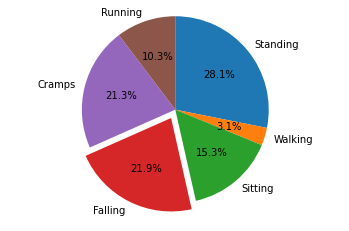

In [ ]:
ACTIVITY_DICT = {0:'Standing', 1:'Walking', 2:'Sitting', 3:'Falling', 4:'Cramps', 5:'Running'}
ACTIVITY_KEYS = list(ACTIVITY_DICT.keys())
activities = list(ACTIVITY_DICT.values())
area = [ACTIVITY_COUNT[0], ACTIVITY_COUNT[1], ACTIVITY_COUNT[2], ACTIVITY_COUNT[3], ACTIVITY_COUNT[4], ACTIVITY_COUNT[5]]
explode = (0, 0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

Figure1, Axes1 = plotAxis.subplots()
Axes1.pie(area, labels=activities, explode = explode, autopct='%1.1f%%', startangle = 90, counterclock=False, shadow=False)
Axes1.axis('equal')
plotAxis.show()

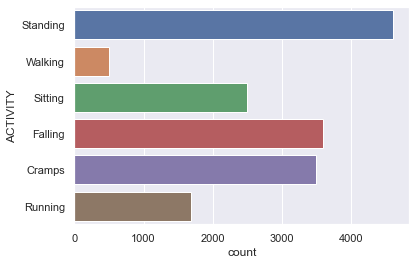

In [ ]:
sns.set(style="darkgrid")
Axes = sns.countplot(y='ACTIVITY', data=df)
Axes.set_yticklabels(activities);

Created pivot_table

In [ ]:

Column_Names = ['TIME','SL','EEG','BP','HR','CIRCLUATION']
Pivot_Table = df.pivot_table(Column_Names,
               ['ACTIVITY'], aggfunc='median')
print(Pivot_Table)

          BP  CIRCLUATION      EEG     HR        SL       TIME
ACTIVITY                                                      
0         50         2321 -5280.00  224.5  51477.50  11316.500
1         21          343 -1435.00   85.0   4770.05   5725.915
2         42          587 -2200.00  128.0   9759.73   7569.470
3         42         1922 -3110.00  196.0  39215.35  10124.150
4         47         1415 -3069.75  174.0  27563.65   9577.390
5         46         1747 -3254.80  179.0  30372.85   9472.360


Created Correlation matrix to check the relationship between two varibales or features.

                 TIME        SL       EEG        BP        HR  CIRCLUATION
TIME         1.000000  0.843200 -0.048278  0.442334  0.973901     0.876956
SL           0.843200  1.000000 -0.050946  0.401064  0.859408     0.978060
EEG         -0.048278 -0.050946  1.000000 -0.049892 -0.050316    -0.050408
BP           0.442334  0.401064 -0.049892  1.000000  0.469164     0.419356
HR           0.973901  0.859408 -0.050316  0.469164  1.000000     0.904160
CIRCLUATION  0.876956  0.978060 -0.050408  0.419356  0.904160     1.000000


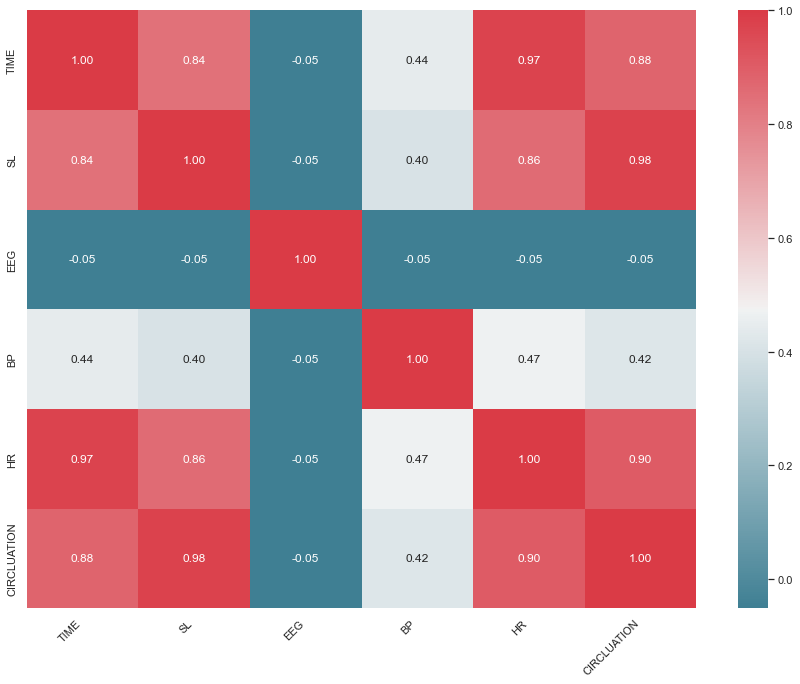

In [ ]:
# Correlation matrix
unstage = df.drop('ACTIVITY', axis=1)
Correlation = unstage.corr()
print(Correlation)
# Plot figsize
Figure, Axes = plotAxis.subplots(figsize=(15, 11))
# Generate Color Map
Map_Color = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(Correlation, cmap=Map_Color, annot=True, fmt=".2f")
Axes.set_xticklabels(
    Column_Names,
    rotation=45,
    horizontalalignment='right'
);
Axes.set_yticklabels(Column_Names);

          TIME        SL       EEG        BP
TIME  1.000000  0.843200 -0.048278  0.442334
SL    0.843200  1.000000 -0.050946  0.401064
EEG  -0.048278 -0.050946  1.000000 -0.049892
BP    0.442334  0.401064 -0.049892  1.000000


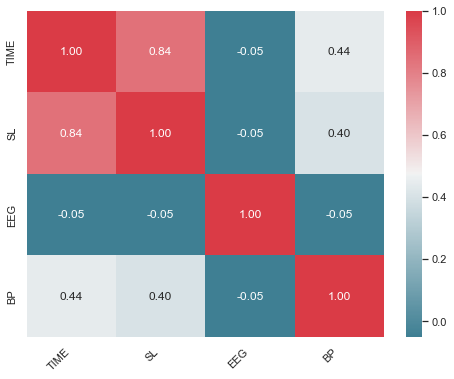

In [ ]:

# Correlation matrix
unstage = df.drop(['ACTIVITY','HR','CIRCLUATION'], axis=1)
Correlation = unstage.corr()
print(Correlation)
# Plot figsize
Figure, Axes = plotAxis.subplots(figsize=(8, 6))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(Correlation, cmap=colormap, annot=True, fmt=".2f")
Axes.set_xticklabels(
    ['TIME','SL','EEG','BP'],
    rotation=45,
    horizontalalignment='right'
);
Axes.set_yticklabels(['TIME','SL','EEG','BP']);

Removed outliers from dataset df

In [ ]:
Quantile1 = df.quantile(0.25)
Quantile2 = df.quantile(0.75)
Quantile_Difference = Quantile2 - Quantile1
dataframe_out = df[~((df < (Quantile1 - 1.5 * Quantile_Difference)) |(df > (Quantile2 + 1.5 * Quantile_Difference))).any(axis=1)]
dataframe_out.shape

(14203, 7)

Created a new column called Decision. This column will contain the values of 0 = 'No Fall', 1 = 'Fall' using following rule: Activity Value : 3 --> Fall, else --> No Fall


In [ ]:
DECISION = []
for i in dataframe_out['ACTIVITY']:
    if i == 3:
        DECISION.append('1')
    else: 
        DECISION.append('0')
dataframe_out['DECISION'] = DECISION
print(dataframe_out.head(10))

   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION DECISION
0         3   4722.92    4019.64 -1600.00  13   79          317        1
1         2   4059.12    2191.03 -1146.08  20   54          165        0
2         2   4773.56    2787.99 -1263.38  46   67          224        0
3         4   8271.27    9545.98 -2848.93  26  138          554        0
4         4   7102.16   14148.80 -2381.15  85  120          809        0
5         5   7015.24    7336.79 -1699.80  22   95          427        0
6         3   8620.28   24949.90 -3198.06  35  157         1519        1
7         3   9238.73   39245.50 -2590.00  15  196         1885        1
8         0  12276.40   59742.00 -5101.00  56  249         2826        0
9         4  14165.50  140950.00 -1410.00  82  315         5844        0


C:\Users\jaish\AppData\Local\Temp/ipykernel_35956/55677429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_out['DECISION'] = DECISION


In [ ]:
dataframe_out['DECISION'].value_counts().sort_index()

0    11051
1     3152
Name: DECISION, dtype: int64

Split the dataset into x and y


In [ ]:
X_Split = dataframe_out.iloc[:,1:7]
Y_Split = dataframe_out['DECISION']
print(X_Split.shape)
print(Y_Split.shape)

(14203, 6)
(14203,)


In [ ]:
print(X_Split.head(10))

       TIME         SL      EEG  BP   HR  CIRCLUATION
0   4722.92    4019.64 -1600.00  13   79          317
1   4059.12    2191.03 -1146.08  20   54          165
2   4773.56    2787.99 -1263.38  46   67          224
3   8271.27    9545.98 -2848.93  26  138          554
4   7102.16   14148.80 -2381.15  85  120          809
5   7015.24    7336.79 -1699.80  22   95          427
6   8620.28   24949.90 -3198.06  35  157         1519
7   9238.73   39245.50 -2590.00  15  196         1885
8  12276.40   59742.00 -5101.00  56  249         2826
9  14165.50  140950.00 -1410.00  82  315         5844


In [ ]:
print(Y_Split.head(10))

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: DECISION, dtype: object


1. Split dataset into train and test.
2. Also applied the standard scaling to get optimized result.

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Split, Y_Split, test_size=0.1, random_state=50)
SC = StandardScaler()
X_Train = SC.fit_transform(X_Train)
X_Test = SC.fit_transform(X_Test)


(12782, 6)
(12782,)
(1421, 6)
(1421,)


1. Perform K-Nearest Neighbors Classifier.
2. Print confusion matrix and accuracy score


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_Train,Y_Train)
KNN_Pred = KNN.predict(X_Test)
Confusion_Matrix = confusion_matrix(Y_Test, KNN_Pred)
Accuracy_Score = accuracy_score(Y_Test, KNN_Pred)
Classification_Report = classification_report(Y_Test, KNN_Pred) 
print(Confusion_Matrix)
print('Accuracy Score :', '%.2f' %Accuracy_Score)
print('Classification Report :')
print(Classification_Report)

[[991 141]
 [107 182]]
Accuracy Score : 0.83
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1132
           1       0.56      0.63      0.59       289

    accuracy                           0.83      1421
   macro avg       0.73      0.75      0.74      1421
weighted avg       0.83      0.83      0.83      1421



1. Perform Random Forest Classifier.
2. Print confusion matrix and accuracy score.

In [ ]:
# Perform 
RF = RandomForestClassifier()
RF.fit(X_Train,Y_Train)
RF_Pred = RF.predict(X_Test)
Confusion_Matrix_RF = confusion_matrix(Y_Test, RF_Pred)
Accuracy_Score_RF = accuracy_score(Y_Test, RF_Pred)
Classification_Report_RF = classification_report(Y_Test, RF_Pred) 
print(Confusion_Matrix_RF)
print('Accuracy Score :', '%.2f' %Accuracy_Score_RF)
print('Classification Report :')
print(Classification_Report_RF)

[[1096   36]
 [ 219   70]]
Accuracy Score : 0.82
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1132
           1       0.66      0.24      0.35       289

    accuracy                           0.82      1421
   macro avg       0.75      0.61      0.63      1421
weighted avg       0.80      0.82      0.79      1421



1. Perform SVM Classifier.
2. Print confusion matrix and accuracy score.

In [ ]:
Svc = SVC()
Svc.fit(X_Train,Y_Train)
SVC_Pred = Svc.predict(X_Test)
Confusion_Matrix_SVC = confusion_matrix(Y_Test, SVC_Pred)
Accuracy_Score_SVC = accuracy_score(Y_Test, SVC_Pred)
Classification_Report_SVC = classification_report(Y_Test, SVC_Pred) 
print(Confusion_Matrix_SVC)
print('Accuracy Score :', '%.2f' %Accuracy_Score_SVC)
print('Classification Report :')
print(Classification_Report_SVC)

[[1123    9]
 [ 275   14]]
Accuracy Score : 0.80
Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1132
           1       0.61      0.05      0.09       289

    accuracy                           0.80      1421
   macro avg       0.71      0.52      0.49      1421
weighted avg       0.76      0.80      0.73      1421



Declaring K-Fold Size = 10 to perfrom Cross validation

In [ ]:
Score = cross_val_score(RF, X_Split, Y_Split, cv=10)
print(Score)
print('Mean accuracy :')
print('%.2f' %Score.mean())

[0.87051372 0.8747361  0.85643913 0.86267606 0.8584507  0.86690141
 0.86760563 0.87746479 0.86760563 0.87464789]
Mean accuracy :
0.87


K Fold Cross validation with KNN classifier

In [ ]:
Score = cross_val_score(KNN, X_Split, Y_Split, cv=10)
print(Score)
print('Mean accuracy :')
print('%.2f' %Score.mean())

[0.82899367 0.82899367 0.82617875 0.82535211 0.81690141 0.83309859
 0.84225352 0.85       0.81901408 0.83239437]
Mean accuracy :
0.83


Set up Stratified K Fold Cross Validation with n_splits=10


In [ ]:

K_Fold = StratifiedKFold(n_splits=10, random_state=None)
K_Fold.get_n_splits(X_Split,Y_Split)

10

K Fold Cross validation with Random Forest classifier

In [ ]:

ACCURACY = []

for IDX_Train, IDX_Test in K_Fold.split(X_Split, Y_Split):
    #print('Train :' , train_index, 'Test : ', test_index)
    X1_train, X1_test = X_Split.iloc[IDX_Train], X_Split.iloc[IDX_Test]
    y1_train, y1_test = Y_Split.iloc[IDX_Train], Y_Split.iloc[IDX_Test]
    
    RF.fit(X1_train, y1_train)
    Test_Prediction = RF.predict(X1_test)
    Accuracy_Score = accuracy_score(Test_Prediction, y1_test)
    ACCURACY.append(Accuracy_Score)
    
print(ACCURACY)
print('Mean accuracy :')
print('%.2f' %np.array(ACCURACY).mean())

[0.8662913441238564, 0.8641801548205489, 0.8508092892329345, 0.8612676056338028, 0.8598591549295774, 0.8640845070422535, 0.8683098591549295, 0.8838028169014085, 0.8732394366197183, 0.8739436619718309]
Mean accuracy :
0.87


K Fold Cross validation with K Nearest Neighbour classifier.






In [ ]:

ACCURACY_KNN = []

for IDX_Train, IDX_Test in K_Fold.split(X_Split, Y_Split):
    #print('Train :' , train_index, 'Test : ', test_index)
    X1_train, X1_test = X_Split.iloc[IDX_Train], X_Split.iloc[IDX_Test]
    y1_train, y1_test = Y_Split.iloc[IDX_Train], Y_Split.iloc[IDX_Test]
    
    KNN.fit(X1_train, y1_train)
    Test_Prediction = KNN.predict(X1_test)
    Accuracy_Score = accuracy_score(Test_Prediction, y1_test)
    ACCURACY_KNN.append(Accuracy_Score)
    
print(ACCURACY_KNN)
print('Mean accuracy :')
print('%.2f' %np.array(ACCURACY_KNN).mean())

[0.82899366643209, 0.82899366643209, 0.8261787473610134, 0.8253521126760563, 0.8169014084507042, 0.8330985915492958, 0.8422535211267606, 0.85, 0.8190140845070423, 0.8323943661971831]
Mean accuracy :
0.83


K Fold Cross validation with Support Vector Machine.

In [ ]:

ACCURACY_SVC = []

for IDX_Train, IDX_Test in K_Fold.split(X_Split, Y_Split):
    X1_train, X1_test = X_Split.iloc[IDX_Train], X_Split.iloc[IDX_Test]
    y1_train, y1_test = Y_Split.iloc[IDX_Train], Y_Split.iloc[IDX_Test]
    
    Svc.fit(X1_train, y1_train)
    Test_Prediction = Svc.predict(X1_test)
    Accuracy_Score = accuracy_score(Test_Prediction, y1_test)
    ACCURACY_SVC.append(Accuracy_Score)
    
print(ACCURACY_SVC)
print('Mean accuracy :')
print('%.2f' %np.array(ACCURACY_SVC).mean())

[0.7776213933849402, 0.7776213933849402, 0.7783251231527094, 0.778169014084507, 0.778169014084507, 0.778169014084507, 0.778169014084507, 0.778169014084507, 0.778169014084507, 0.778169014084507]
Mean accuracy :
0.78


FEATURE IMPORTANCE

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
RF_Model = RandomForestClassifier(random_state=0)
RF_Model.fit(X_Split,Y_Split)


RandomForestClassifier(random_state=0)

[0.18642868 0.24456375 0.1938805  0.15733357 0.10439045 0.11340306]


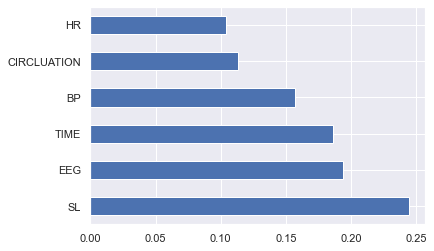

In [ ]:
print(RF_Model.feature_importances_) 
Importances = pd.Series(RF_Model.feature_importances_, index=X_Split.columns)
Importances.nlargest(10).plot(kind='barh')
plt.show()

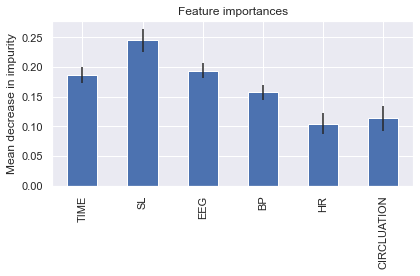

In [ ]:
import pandas as pd

Std = np.std([tree.feature_importances_ for tree in RF_Model.estimators_], axis=0)
figure, axes = plt.subplots()
Importances.plot.bar(yerr=Std, ax=axes)
axes.set_title("Feature importances")
axes.set_ylabel("Mean decrease in impurity")
figure.tight_layout()

FORWARD FEATURE SELECTION

In [ ]:
# Importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection
sfs = SFS(RandomForestClassifier(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

In [ ]:
sfs.fit(X_Split, Y_Split)
sfs.k_feature_names_

('TIME', 'SL', 'EEG', 'BP')

FORWARD FEATURE SELECTION WITH n FEATURES

In [ ]:
# Reading data from csv file
df1 = pd.read_csv("C:/Users/jaish/Downloads/ResearchMethodology/Project/Final/falldetection.csv", sep=",")
print(df1.head(10))


   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION
0         3   4722.92    4019.64 -1600.00  13   79          317
1         2   4059.12    2191.03 -1146.08  20   54          165
2         2   4773.56    2787.99 -1263.38  46   67          224
3         4   8271.27    9545.98 -2848.93  26  138          554
4         4   7102.16   14148.80 -2381.15  85  120          809
5         5   7015.24    7336.79 -1699.80  22   95          427
6         3   8620.28   24949.90 -3198.06  35  157         1519
7         3   9238.73   39245.50 -2590.00  15  196         1885
8         0  12276.40   59742.00 -5101.00  56  249         2826
9         4  14165.50  140950.00 -1410.00  82  315         5844


In [ ]:
dataframe_1=df1.drop(columns=['HR','CIRCLUATION'])

In [ ]:
dataframe_1

,ACTIVITY,TIME,SL,EEG,BP
0,3,4722.92,4019.64,-1600.00,13
1,2,4059.12,2191.03,-1146.08,20
2,2,4773.56,2787.99,-1263.38,46
3,4,8271.27,9545.98,-2848.93,26
4,4,7102.16,14148.80,-2381.15,85
...,...,...,...,...,...
16377,4,9280.68,11417.00,-3021.64,36
16378,3,8479.69,9455.54,-2932.85,17
16379,2,8872.53,27449.90,-2870.00,33
16380,4,7738.99,26466.40,-2920.24,97


In [ ]:
Quantile3 = dataframe_1.quantile(0.25)
Quantile4 = dataframe_1.quantile(0.75)
Quantile_Difference = Quantile4 - Quantile3
dfout_1 = dataframe_1[~((dataframe_1 < (Quantile3 - 1.5 * Quantile_Difference)) |(dataframe_1 > (Quantile4 + 1.5 * Quantile_Difference))).any(axis=1)]
dfout_1.shape



(14203, 5)

In [ ]:

DECISION = []
for i in dfout_1['ACTIVITY']:
    if i == 3:
        DECISION.append('1')
    else: 
        DECISION.append('0')
dfout_1['DECISION'] = DECISION
print(dfout_1.head(10))

   ACTIVITY      TIME         SL      EEG  BP DECISION
0         3   4722.92    4019.64 -1600.00  13        1
1         2   4059.12    2191.03 -1146.08  20        0
2         2   4773.56    2787.99 -1263.38  46        0
3         4   8271.27    9545.98 -2848.93  26        0
4         4   7102.16   14148.80 -2381.15  85        0
5         5   7015.24    7336.79 -1699.80  22        0
6         3   8620.28   24949.90 -3198.06  35        1
7         3   9238.73   39245.50 -2590.00  15        1
8         0  12276.40   59742.00 -5101.00  56        0
9         4  14165.50  140950.00 -1410.00  82        0


C:\Users\jaish\AppData\Local\Temp/ipykernel_35956/3311375257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfout_1['DECISION'] = DECISION


In [ ]:
X_split1 = dfout_1[['TIME','SL','EEG','BP']]
Y_split1 = dfout_1['DECISION']
print(X_split1.shape)
print(Y_split1.shape)


(14203, 4)
(14203,)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_split1, Y_split1, test_size=0.1, random_state=50)
sc1 = StandardScaler()
#sc = MinMaxScaler()
X_train1 = sc1.fit_transform(X_train1)
X_test1 = sc1.fit_transform(X_test1)

print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(12782, 4)
(12782,)
(1421, 4)
(1421,)


Perform Random Forest Classifier with Feature Importance and Forward Feature Selection.




In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train1,y_train1)
rf_predict = rf.predict(X_test1)

# Print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test1, rf_predict)
rf_acc_score = accuracy_score(y_test1, rf_predict)
rf_class_report = classification_report(y_test1, rf_predict)
print(rf_conf_matrix)
print('Accuracy Score :','%.2f' %rf_acc_score)
print('Classification Report :')
print(rf_class_report)

[[1051   81]
 [ 162  127]]
Accuracy Score : 0.83
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1132
           1       0.61      0.44      0.51       289

    accuracy                           0.83      1421
   macro avg       0.74      0.68      0.70      1421
weighted avg       0.81      0.83      0.82      1421



In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X_split1,Y_split1)

10

In [ ]:
accuracy=[]

for train_index, test_index in skf.split(X_split1, Y_split1):
    #print('Train :' , train_index, 'Test : ', test_index)
    X1_train1, X1_test1 = X_split1.iloc[train_index], X_split1.iloc[test_index]
    y1_train1, y1_test1 = Y_split1.iloc[train_index], Y_split1.iloc[test_index]
    
    rf.fit(X1_train1, y1_train1)
    prediction = rf.predict(X1_test1)
    score = accuracy_score(prediction, y1_test1)
    accuracy.append(score)
    
print(accuracy)
print('Mean accuracy :')
print('%.2f' %np.array(accuracy).mean())

[0.8536242083040113, 0.8522167487684729, 0.8409570724841661, 0.8485915492957746, 0.8457746478873239, 0.8401408450704225, 0.8422535211267606, 0.8647887323943662, 0.8633802816901408, 0.8591549295774648]
Mean accuracy :
0.85
